# Udacity Nanodegree Project1: Investigate a Dataset - [European Soccer Database] - 09/10 Season
**Name** : **Oke** Oladunsi



Hi, if you need to skip the technical facts kindly click <a href="./european_slide_deck_template.ipynb">here</a> for a summary of facts and findings carried out during the scope of study.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="intro">Questions</a></li> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>
<li><a href="#conclusions">References</a></li>
</ul>
         

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This soccer database comes from Kaggle which is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from 11 European countries from 2008 to 2016. 
    
  ##
   <ul>
        <li><a href="#databank"> The database is stored in a SQLite database.which consist of: </a></li>
        <li><a href="#matches">+25,000 matches</a></li>
        <li><a href="#players"> +10,000 players</a></li>
        <li><a href="#leagues"> 11 European Countries with their lead championship</a></li>
        <li><a href="#team_attr"> Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</a></li>
        <li><a href="#seasons"> Seasons 2008 to 2016</a></li>
        <li><a href="#players_attr"> Players attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</a></li>
        <li><a href="#matches"> Betting odds from up to 10 providers</a></li>
        <li><a href="#matches"> Detailed match events (goal types, possession, corner, cross, fouls, cards etc…)</a></li>
    </ul>

### Question(s) for Analysis
During my investigation i would be trying to give answers to the following questions:

>**Tip**:<a href="#Q1"> What are the top 20 performing teams (goals scored) in european top 5 (five) leagues for the 2009/2010 season</a>
##

>**Tip**:<a href="#Q2">  Are there any correlations between goals scored or conceeded and games won per team</a>

##
> **Tip**: <a href="#Q3"> Are there significance relationship between the amount of home games won and the the team position at the end of the season</a>

<a href="#Q5"> these and more questions will i be investigating during this entire process</a>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Data Cleaning (N:B for this project i have downloaded the database into my pc and i will be accessing using pandas sql module provided by pandas.)
through out this project the following packages are going to be employed:
 <ul>
        <li><a href="#"> pandas </a></li>
        <li><a href="#">sqlite3</a></li>
        <li><a href="#"> numpy</a></li>
        <li><a href="#"> matplotlib</a></li>
 </ul>


conda install pandas,sqlite3,numpy, matplotlib

In [2]:
# importing necessary packages

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

import pandas as pd
import sqlite3 as sq
import numpy as np
import matplotlib.pyplot as plt

# Standard plotly imports
import chart_studio.plotly.plotly as ply
import plotly.graph_objs as go
import chart_studio.plotly.plotly.iplot as iplot

from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# working with matplotlib inline
%matplotlib inline  

In [ ]:
from chart_studio.plotly.plotly import iplot

<a id='databank'></a>
## Loading data into pandas dataframe


In [2]:
# creating a SQL connection to the db
con = sq.connect('database.sqlite')
cur = con.cursor()



In [3]:
# exracting db info pandas
df_european_countries = pd.read_sql_query("SELECT * FROM country", con)
df_european_fc_players = pd.read_sql_query("SELECT * FROM player", con)
df_european_fc_players_attr = pd.read_sql_query("SELECT * FROM player_attributes", con)
df_european_fc_team_attr = pd.read_sql_query("SELECT * FROM team_attributes", con)
df_european_league = pd.read_sql_query("SELECT * FROM league", con)
df_european_teams = pd.read_sql_query("SELECT * FROM team", con)
df_european_matches = pd.read_sql_query("SELECT * FROM match", con)


In [4]:
df_european_countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
print(df_european_countries.describe())


                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000


<a id='intro'></a>
## Total players playing the europe during this period can be found running the cell below

In [6]:
print(df_european_fc_players.info())
df_european_fc_players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
df_european_fc_players.duplicated().sum()

0

In [8]:
print(df_european_fc_players_attr.info())
df_european_fc_players_attr.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [9]:
print(df_european_teams.info())
df_european_teams.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


<a id='team_attr'></a>
## Teams attributes can be found running the cell below.
**N:B** the only column without complete info is buildUpPlayDribbling

In [10]:
df_european_fc_team_attr.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [11]:
print(df_european_fc_team_attr.info())
df_european_fc_team_attr.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


<a id='intro'></a>
## The european countries and their respective leagues can be found running the cell below

In [12]:
df_european_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


<a id='intro'></a>
## Total matches in the database can be found running the cell below

In [13]:

df_european_matches.shape

(25979, 115)

<a id='seasons'></a>
## Total seasons in the database can be found running the cell below

In [14]:
for i in df_european_matches.season.unique():
    print(i)

2008/2009
2009/2010
2010/2011
2011/2012
2012/2013
2013/2014
2014/2015
2015/2016


In [15]:
def getting_league_and_season(leag_id, season):
    """
    This function returns a string of the league name and the season as a single word

    WHERE:

    league_name : this extracts the league name from the european league. i.e (Belgium Jupiler League --> belgium_jupiler_league)
    season_name : this extracts the season tags and replace '/' to '_' i.e (2009/2010 --> 2009_2010)

    RETURNS
    a single string in the form belgium_jupiler_league_2009_2010
    """
    league_name = df_european_league.query("id == {}".format(leag_id))["name"].to_string().replace(" ","_")[5:]
    season_name = season.replace("/","_")
    if league_name[0] == "_":
        return league_name[1:]+"_"+season_name
    return league_name+"_"+season_name

In [16]:
def get_season_stats(fa_id,season):
    """ 
    This function generates valuable stats of season for the league_id given and also generated a csv file for the storage

    definintion of variable names

    temp: this is a container for every team in a particular league 
    home_win : this give the total amount of games won by each team in a season in their home stadium
    away_win : this give the total amount of games won by each team in a season in an opponent stadium
    away_draw : this give the total amount of games drew by each team in a season in an opponent stadium
    home_draw : this give the total amount of games drew by each team in a season in their home stadium
    home_loss : this give the total amount of games loss by each team in a season in their home stadium
    away_loss : this give the total amount of games loss by each team in a season in an opponent stadium

    goals stats------>

    home_goals_scored : this give the total amount of goals scored by each team in a season in their home stadium
    away_goals_scored : this give the total amount of goals scored by each team in a season in an opponent stadium
    home_goals_conceded : this give the total amount of goals conceded by each team in a season in their home stadium
    away_goals_conceded : this give the total amount of goals conceded by each team in a season in an opponent stadium

    definition of summary stats ---->
    GP : Total amount of games pLayed in a season
    HW : Total Games won in their home statium
    AW : Total Games won in an opponent stadium
    HD : Total Games drew in their home statium
    AD : Total Games drew in an opponent stadium
    HL : Total Games loss in their home statium
    AL : Total Games loss in an opponent stadium
    W  : Sum total of all games won in a season
    L  : Sum total of the games loss in a season
    D  :  Sum total of the games drew in a season

    P  : Total points the team got in a season were:
        3 points for each game won
        1 point for each game drew
        0 point for each game loss 

    F  : Sum total of the goals scored in a season
    A :  Sum total of the goals conceded in a season
    +/- : Differences between F and A i.e (+/- = F-A)

    """
    # All the matches each league in season from 2009/2010 - 2015/2015

    season_matches = df_european_matches.query('league_id == {} and season == "{}"'.format(fa_id,season))
    df_season = pd.DataFrame(season_matches.home_team_api_id.unique())
    df_season.columns = ["team_id"] 
    # temporary container for club names
    temp = []
    home_win = []
    away_win = []
    away_draw = []
    home_draw = []
    home_loss = []
    away_loss = []
    home_goals_scored = []
    away_goals_scored = []
    home_goals_conceded = []
    away_goals_conceded = []
    for team in season_matches.home_team_api_id.unique():
        temp.append(df_european_teams.query('team_api_id == {}'.format(team)).team_long_name)
        home_games = season_matches.query('home_team_api_id == {}'.format(team))
        away_games = season_matches.query('away_team_api_id == {}'.format(team))
        home_win.append(season_matches.query('home_team_goal > away_team_goal and home_team_api_id == {}'.format(team)).shape[0])
        away_win.append(season_matches.query('away_team_goal > home_team_goal and away_team_api_id == {}'.format(team)).shape[0])
        home_draw.append(season_matches.query('home_team_goal == away_team_goal and home_team_api_id == {}'.format(team)).shape[0])
        away_draw.append(season_matches.query('away_team_goal == home_team_goal and away_team_api_id == {}'.format(team)).shape[0])
        home_loss.append(season_matches.query('home_team_goal < away_team_goal and home_team_api_id == {}'.format(team)).shape[0])
        away_loss.append(season_matches.query('away_team_goal < home_team_goal and away_team_api_id == {}'.format(team)).shape[0])
        ########################################Goals###########################################################################################
        home_goals_scored.append(season_matches.query('home_team_api_id == {}'.format(team)).home_team_goal.sum())
        away_goals_scored.append(season_matches.query('away_team_api_id == {}'.format(team)).away_team_goal.sum())
        home_goals_conceded.append(season_matches.query('home_team_api_id == {}'.format(team)).away_team_goal.sum())
        away_goals_conceded.append(season_matches.query('away_team_api_id == {}'.format(team)).home_team_goal.sum())

    #### Stats###########
    df_season["team_name"] = pd.DataFrame(np.array(temp))
    df_season["GP"] = len(home_games+away_games)
    df_season["HW"] = pd.DataFrame(np.array(home_win))
    df_season["AW"] = pd.DataFrame(np.array(away_win))
    df_season["HD"] = pd.DataFrame(np.array(home_draw))
    df_season["AD"] = pd.DataFrame(np.array(away_draw))
    df_season["HL"] = pd.DataFrame(np.array(home_loss))
    df_season["AL"] = pd.DataFrame(np.array(away_loss))
    df_season["W"] = df_season["HW"] + df_season["AW"]
    df_season["L"] = df_season["HL"] + df_season["AL"]
    df_season["D"] = df_season["HD"] + df_season["AD"]
    df_season["P"] = df_season["W"] *3 + df_season["D"] *1 + df_season["L"]*0
    df_season["F"] = pd.DataFrame(np.array(home_goals_scored)) + pd.DataFrame(np.array(away_goals_scored))
    df_season["A"] = pd.DataFrame(np.array(home_goals_conceded)) + pd.DataFrame(np.array(away_goals_conceded))
    df_season["+/-"] = df_season["F"] - df_season["A"]
    df_season = df_season.sort_values(by=['P','+/-'], ascending=False)
    
    ######### setting file name and creating csv file
    name = getting_league_and_season(fa_id,season).lower()
    df_season.to_csv(name+".csv", index=False)
    

In [17]:
#creating csv file for each season
for i in df_european_matches.league_id.unique():
    for j in df_european_matches.season.unique():
        get_season_stats(i,j)



In [18]:
con.close()

<a id='eda'></a>

## Exploratory Data Analysis

> **Tip**: At this point I have generated several csv's file for the standings for each league which is for 8 seasons. So therefore, from the generated csv file

### Research Question 1 (What are the top 20 teams with the most goals in the 2009-2010 season in europe top five leagues)

In [4]:
spain_liga_league_09_10 = pd.read_csv("spain_liga_bbva_2009_2010.csv")
english_premier_league_09_10 = pd.read_csv("england_premier_league_2009_2010.csv")
france_ligue_1_09_10 = pd.read_csv("france_ligue_1_2009_2010.csv")
germany_1_bundesliga_09_10 = pd.read_csv("germany_1._bundesliga_2009_2010.csv")
italy_seria_a_09_10 = pd.read_csv("italy_serie_a_2009_2010.csv")



## I will continue analysi on this later, so for now i will turn it to markdown cell
spain_liga_league_10_11 = pd.read_csv("spain_liga_bbva_2010_2011.csv")
english_premier_league_10_11 = pd.read_csv("england_premier_league_2010_2011.csv")
france_ligue_1_10_11 = pd.read_csv("france_ligue_1_2010_2011.csv")
germany_1_bundesliga_10_11 = pd.read_csv("germany_1._bundesliga_2010_2011.csv")
italy_seria_a_10_11 = pd.read_csv("italy_serie_a_2010_2011.csv")

## I will continue analysi on this later, so for now i will have turn it to markdown cell that i might meet submition deadline

> **Tip**: I wanted to investigate how teams in the top five leagues performed over the course of 5 seasons, but now i will only do with one season.

spain_liga_league_10_11 = pd.read_csv("spain_liga_bbva_2010_2011.csv")
english_premier_league_10_11 = pd.read_csv("england_premier_league_2010_2011.csv")
france_ligue_1_10_11 = pd.read_csv("france_ligue_1_2010_2011.csv")
germany_1_bundesliga_10_11 = pd.read_csv("germany_1._bundesliga_2010_2011.csv")
italy_seria_a_10_11 = pd.read_csv("italy_serie_a_2010_2011.csv")

spain_liga_league_11_12 = pd.read_csv("spain_liga_bbva_2011_2012.csv")
english_premier_league_11_12 = pd.read_csv("england_premier_league_2011_2012.csv")
france_ligue_1_11_12 = pd.read_csv("france_ligue_1_2011_2012.csv")
germany_1_bundesliga_11_12 = pd.read_csv("germany_1._bundesliga_2011_2012.csv")
italy_seria_a_11_12 = pd.read_csv("italy_serie_a_2011_2012.csv")


spain_liga_league_12_13 = pd.read_csv("spain_liga_bbva_2012_2013.csv")
english_premier_league_12_13 = pd.read_csv("england_premier_league_2012_2013.csv")
france_ligue_1_12_13 = pd.read_csv("france_ligue_1_2012_2013.csv")
germany_1_bundesliga_12_13 = pd.read_csv("germany_1._bundesliga_2012_2013.csv")
italy_seria_a_12_13 = pd.read_csv("italy_serie_a_2012_2013.csv")

In [25]:
seasons_09_10 = spain_liga_league_09_10
for league in [english_premier_league_09_10,france_ligue_1_09_10,germany_1_bundesliga_09_10,italy_seria_a_09_10]:
    seasons_09_10 = seasons_09_10.append(league)

# this is a standing of how each team in europe top five leagues performed
season_09_10 = seasons_09_10.reset_index()

# extracting only the top 20 teams with the most goals
top_20_team_with_most_goals_09_10 = season_09_10.sort_values(by=["F"], ascending=False)[:21]

# extracting only the top 20 teams that conceeded most goals
top_20_team_conceeding_most_goals_09_10 = season_09_10.sort_values(by=["A"], ascending=False)[:21]


# extracting only the top 20 teams with most  home wins
top_20_team_with_most_homeWin_09_10 = season_09_10.sort_values(by=["HW"], ascending=False)[:21]

# extracting only the top 20 teams with most away wins
top_20_team_with_most_awayWin_09_10 = season_09_10.sort_values(by=["AW"], ascending=False)[:21]

# extracting only the top 20 teams with most wins
top_20_team_with_most_Wins_09_10 = season_09_10.sort_values(by=["W"], ascending=False)[:21]


# extracting only the top 20 teams with most  home loss
top_20_team_with_most_homeloss_09_10 = season_09_10.sort_values(by=["HL"], ascending=False)[:21]

# extracting only the top 20 teams with most away loss
top_20_team_with_most_awayloss_09_10 = season_09_10.sort_values(by=["AL"], ascending=False)[:21]

# extracting only the top 20 teams with most loss
top_20_team_with_most_loss_09_10 = season_09_10.sort_values(by=["L"], ascending=False)[:21]

<a id='Q1'></a>
## Top 20 clubs in all of europe top five(5) leagues for the 2009/2010 season can be found running the cell below

- What are the top 20 performing teams (goals scored) in european top 5 (five) leagues for the 2009/2010 season
- Does goals score relate to if a team will be in the top 4 team in their respective leagues.
- What are the top 20 performing teams (goals scored) in european top 5 (five) leagues for the 2009/2010 season
</a>

In [25]:
top_20_team_with_most_goals_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
20,0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71
1,1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67
0,0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74
21,1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58
22,2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42
78,0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41
24,4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28
43,3,8639,LOSC Lille,38,14,7,3,4,2,8,21,10,7,70,72,40,32
60,0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41
62,2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31


In [ ]:
top_20_team_with_most_goals_09_10.py(x="team_name",y="F",kind="bar", title="Top 20 teams with most goals in europe 09/10")
plt.legend(["Teams"])
plt.xlabel("Teams")
plt.ylabel("Amount of goals scored")
plt.show()

In [21]:
top_teams_with_most_goals_scored_less_goals_conceeded_09_10 = top_20_team_with_most_goals_09_10[["F","A","team_name"]].set_index("team_name")


top_teams_with_most_goals_scored_less_goals_conceeded_09_10.iplot(kind='bar', xTitle='teams',
                  yTitle='goals scored/conceeded', title='Top 20 teams in europe (Compare goals scored vs goals conceded in europe 09/10')

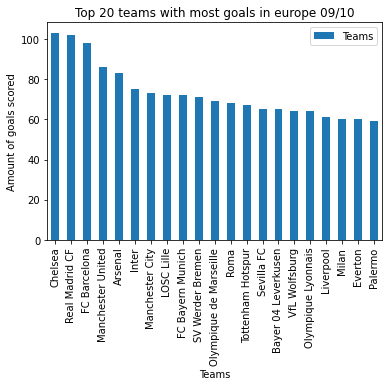

In [5]:
top_20_team_with_most_goals_09_10.plot(x="team_name",y="F",kind="bar", title="Top 20 teams with most goals in europe 09/10")
plt.legend(["Teams"])
plt.xlabel("Teams")
plt.ylabel("Amount of goals scored")
plt.show()

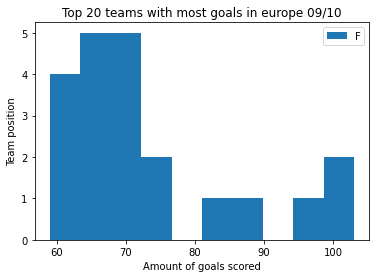

In [23]:
top_20_team_with_most_goals_09_10.plot(x="team_name",y="F",kind="hist", title="Top 20 teams with most goals in europe 09/10")
plt.ylabel("Team position")
plt.xlabel("Amount of goals scored")
plt.show()

In [12]:
top_20_team_with_most_goals_09_10['F'].iplot(kind='hist', xTitle='goals scored',
                  yTitle='Team position', title='Top 20 teams with most goals in europe 09/10')

In [14]:
top_20_team_with_most_goals_09_10['F'].iplot(kind='scatter', xTitle='goals scored',
                  yTitle='Team position', title='Top 20 teams with most goals in europe 09/10')

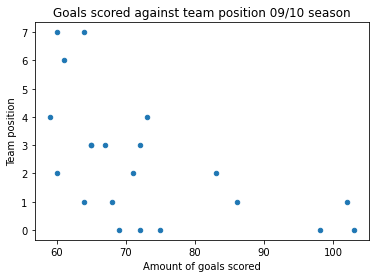

In [29]:
top_20_team_with_most_goals_09_10.plot(x="F",y="index",kind="scatter",title="Goals scored against team position 09/10 season")

plt.ylabel("Team position")
plt.xlabel("Amount of goals scored")
plt.show()

In [9]:
top_20_team_with_most_goals_09_10['A'].iplot(kind='hist', xTitle='goals conceeded',
                  yTitle='Team position', title='Top 20 teams with most goals in europe 09/10')

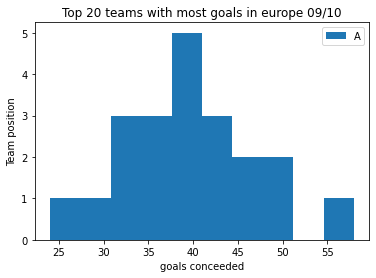

In [6]:
top_20_team_with_most_goals_09_10.plot(x="W",y="A",kind="hist", title="Top 20 teams with most goals in europe 09/10")
plt.ylabel("Team position")
plt.xlabel("goals conceeded")
plt.show()

<a id='A1'></a>
## Answers to the questions asked above
- The team with the most goals in europe for the 2009-2010 season is Chelsea FC
- we can deduce that if a team can score between 60-100 goals such a team will be among the top four best teams in their leagues.
- we can deduce that if a team can conceed goals less than 55 goals in the season, such a team will be among the top four best teams in their leagues.
- Another thing we can clearly see is that teams that conceed between 23-32 are outwrite winners of their league or becomes second runner

<a id='A3'></a>
- from the scatter plot before the recent histogram we can see that there is about 85% chance that a team would will qualify for champions leagues if they scored more goals between (59-100 goals) taking amples from the 20 teams with most goals.

<a id='Q2'></a>
### Research Question 2  ( Are there any correlations between goals scored and games won per team)


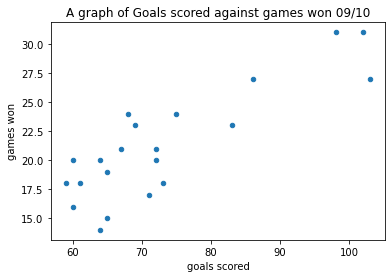

The graph above shows that there is a possitive correlation between amount of goal scored and games won which is : 84.85%


In [41]:
top_20_team_with_most_goals_09_10.plot(x="F",y="W",kind="scatter",title="A graph of Goals scored against games won 09/10")

plt.xlabel("goals scored")
plt.ylabel("games won")
plt.show()
print("The graph above shows that there is a possitive correlation between amount of goal scored and games won which is : {}%".format(round(top_20_team_with_most_goals_09_10["F"].corr(top_20_team_with_most_goals_09_10["W"])*100, 2)))

In [26]:
# extracting only the top 20 teams with the most goals
top_20_team_with_least_goals_09_10 = season_09_10.sort_values(by=["F"], ascending=True)[:21]


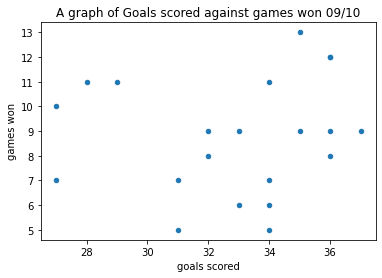

The graph above shows that there is a possitive correlation between amount of goal scored and games won which is : 11.38%


In [42]:
top_20_team_with_least_goals_09_10.plot(x="F",y="W",kind="scatter",title="A graph of Goals scored against games won 09/10")

plt.xlabel("goals scored")
plt.ylabel("games won")
plt.show()
print("The graph above shows that there is a possitive correlation between amount of goal scored and games won which is : {}%".format(round(top_20_team_with_least_goals_09_10["F"].corr(top_20_team_with_least_goals_09_10["W"])*100, 2)))

In [29]:
least_performing_teams_with_least_goals_scored_more_goals_conceeded_09_10 = top_20_team_with_least_goals_09_10[["F","A","team_name"]].set_index("team_name")


least_performing_teams_with_least_goals_scored_more_goals_conceeded_09_10.iplot(kind='bar', xTitle='teams',
                  yTitle='goals scored/conceeded', title='the least performing teams in europe top five leagues for 09/10 season (Compare goals scored vs goals conceded')

In [28]:
top_20_team_with_least_goals_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
97,19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34
56,16,9853,AS Saint-Étienne,38,5,5,7,3,7,11,10,18,10,40,27,45,-18
55,15,9874,FC Sochaux-Montbéliard,38,8,3,1,7,10,9,11,19,8,41,28,52,-24
10,10,8558,RCD Espanyol,38,9,2,6,5,4,12,11,16,11,44,29,46,-17
58,18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31
59,19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30
34,14,8602,Wolverhampton Wanderers,38,5,4,6,5,8,10,9,18,11,38,32,56,-24
75,15,8165,1. FC Nürnberg,34,5,3,4,3,8,11,8,19,7,31,32,58,-26
72,12,8722,1. FC Köln,34,3,6,6,5,8,6,9,14,11,38,33,42,-9
76,16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31


<a id='A2'></a>
## Answers to the questions asked above
- we can clearly see that teams with 55-100+ goals won atleast 15-30+ games
- we also see that teams that score goals between 25-40+ goals wins 5-13 games (thus, this implies that the fewer the goals a team score the the chances of winning a match)

In [34]:
top_20_team_conceeding_most_goals_09_10


,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
37,17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40
35,15,8528,Wigan Athletic,38,6,3,7,2,6,14,9,20,9,36,37,79,-42
38,18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41
18,18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34
96,18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27
33,13,8559,Bolton Wanderers,38,6,4,6,3,7,12,10,19,9,39,42,67,-25
74,14,9904,Hannover 96,34,5,4,4,2,8,11,9,19,6,33,43,67,-24
39,19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32
36,16,8654,West Ham United,38,7,1,5,6,7,12,8,19,11,35,47,66,-19
19,19,9868,Xerez Club Deportivo,38,6,2,4,6,9,11,8,20,10,34,38,66,-28


In [31]:
teams_with_most_goals_conceeded_09_10 = top_20_team_conceeding_most_goals_09_10[["A","team_name"]].set_index("team_name")


teams_with_most_goals_conceeded_09_10.iplot(kind='bar', xTitle='teams',
                  yTitle='goals scored/conceeded', title='A chart of Top 20 teams in europe top five leagues for 09/10 season that conceeded the most goals (Compare goals scored vs goals conceded')

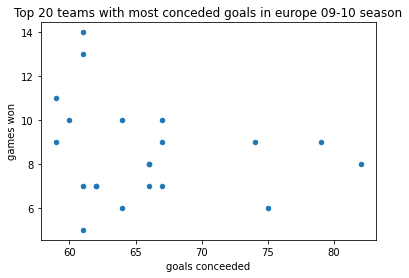

In [40]:
top_20_team_conceeding_most_goals_09_10.plot(x="A",y="W",kind="scatter", title="Top 20 teams with most conceded goals in europe 09-10 season")

plt.xlabel("goals conceeded")
plt.ylabel("games won")
plt.show()


In [30]:
print("The graph above shows that there is a negative correlation of : {}%".format(round(top_20_team_conceeding_most_goals_09_10["A"].corr(top_20_team_conceeding_most_goals_09_10["W"])*100, 2)))


The graph above shows that there is a negative correlation of : -20.6%


- this histgram shows clearly that the more a team conceeds the less the chance the team wins a match

In [31]:
english_premier_league_09_10.sort_values(by=["L"])

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28
5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42
7,8668,Everton,38,11,5,6,7,2,7,16,9,13,61,60,49,11
3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26
6,8650,Liverpool,38,13,5,3,6,3,8,18,11,9,63,61,35,26
10,10194,Stoke City,38,7,4,6,8,6,7,11,13,14,47,34,48,-14
9,8655,Blackburn Rovers,38,10,3,6,5,3,11,13,14,11,50,41,55,-14


In [31]:
spain_liga_league_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67
2,10267,Valencia CF,38,13,8,5,3,1,8,21,9,8,71,59,40,19
3,8302,Sevilla FC,38,10,9,6,0,3,10,19,13,6,63,65,49,16
4,8661,RCD Mallorca,38,15,3,1,7,3,9,18,12,8,62,59,44,15
5,8305,Getafe CF,38,11,6,4,3,4,10,17,14,7,58,58,48,10
6,10205,Villarreal CF,38,13,3,3,5,3,11,16,14,8,56,58,57,1
7,8315,Athletic Club de Bilbao,38,11,4,4,5,4,10,15,14,9,54,50,53,-3
8,9906,Atlético Madrid,38,11,2,3,5,5,12,13,17,8,47,57,61,-4
9,9783,RC Deportivo de La Coruña,38,9,4,4,4,6,11,13,17,8,47,35,49,-14


In [33]:
france_ligue_1_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33
1,9748,Olympique Lyonnais,38,12,8,4,8,3,3,20,6,12,72,64,38,26
2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13
3,8639,LOSC Lille,38,14,7,3,4,2,8,21,10,7,70,72,40,32
4,10249,Montpellier Hérault SC,38,12,8,4,5,3,6,20,9,9,69,50,40,10
5,9827,Girondins de Bordeaux,38,12,7,4,3,3,9,19,12,7,64,58,40,18
6,8689,FC Lorient,38,10,6,7,3,2,10,16,12,10,58,54,42,12
7,9829,AS Monaco,38,11,4,5,5,3,10,15,13,10,55,39,45,-6
8,9851,Stade Rennais FC,38,10,4,4,7,5,8,14,13,11,53,52,41,11
9,9873,Valenciennes FC,38,7,7,7,3,5,9,14,14,10,52,50,50,0


<a id='A4'></a>

 - This shows that the worst defensive team in all of europe is Burnley who is joint 1st with portsmouth as team with most losses in epl.
 - Also the tread occurs in la liga where CD Tenerife and Xerez Club Deportivo appeared and both relegated
  - Also the tread occurs in the france ligue 1 where US Boulogne Cote D'Opale and Grenoble Foot 38 appeared and both relegated 
 ##### Hence
N:B both teams relegated

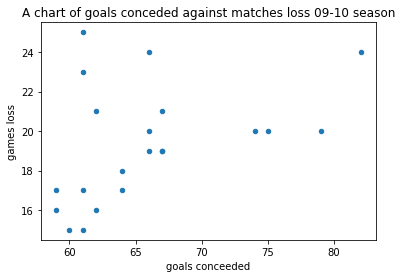

In [41]:
top_20_team_conceeding_most_goals_09_10.plot(x="A",y="L",kind="scatter", title="A chart of goals conceded against matches loss 09-10 season",)
plt.xlabel("goals conceeded")
plt.ylabel("games loss")
plt.show()


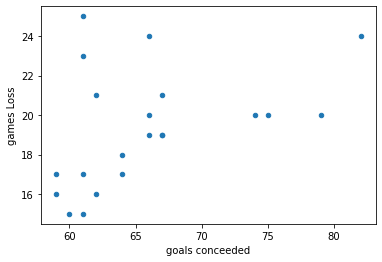

The graph above shows that there is a possitive correlation between amount of goal conceeded and games Loss which is : 31.65%


In [39]:
top_20_team_conceeding_most_goals_09_10.plot(x="A",y="L",kind="scatter")
plt.xlabel("goals conceeded")
plt.ylabel("games Loss")
plt.show()
print("The graph above shows that there is a possitive correlation between amount of goal conceeded and games Loss which is : {}%".format(round(top_20_team_conceeding_most_goals_09_10["A"].corr(top_20_team_conceeding_most_goals_09_10["index"])*100, 2)))


- The graph above shows that there is a possitive correlation between amount of goal conceded and a teams position at the end of season is : 31.64%
- which shows that the more goals a team concedes the more a team losses matches


<a id='Q3'></a>

# Research Question 3  Are there significance relationship between the amount of home games won and the the team position at the end of the season



In [54]:
top_20_team_with_most_homeWin_09_10.reset_index(inplace=True)


In [60]:
top_20_team_with_most_homeWin_09_10.drop("level_0", inplace=True, axis=1)

In [61]:
top_20_team_with_most_homeWin_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74
1,1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67
2,0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71
3,1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58
4,1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27
5,4,8661,RCD Mallorca,38,15,3,1,7,3,9,18,12,8,62,59,44,15
6,2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42
7,0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41
8,0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33
9,3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26


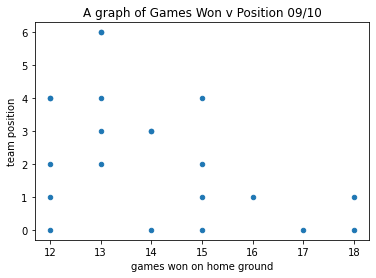

The graph above shows that there is a seem to negative correlation between amount of game won at home and and the team position at the end of the season of  : -46.71%


In [64]:
top_20_team_with_most_homeWin_09_10.plot(x="HW",y="index",kind="scatter", title="A graph of Games Won v Position 09/10")
plt.xlabel("games won on home ground")
plt.ylabel("team position")
plt.show()
print("The graph above shows that there is a seem to negative correlation between amount of game won at home and and the team position at the end of the season of  : {}%".format(round(top_20_team_with_most_homeWin_09_10["HW"].corr(top_20_team_with_most_homeWin_09_10["index"])*100, 2)))

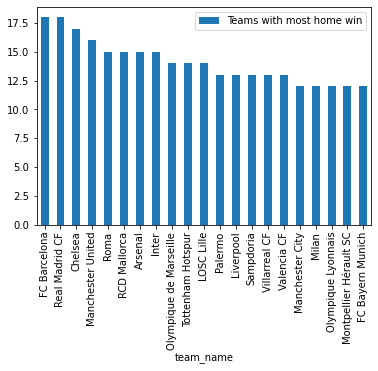

In [37]:
top_20_team_with_most_homeWin_09_10.plot(x="team_name",y="HW",kind="bar")
plt.xlabel("goals conceeded")
plt.ylabel("games Loss")
plt.legend(["Teams with most home win"])
plt.show()

- Here it shows that Barcelona performed better at home than every other teams in europe in terms of home games won
- We can see also that atleast four teams amongst top 20 in europe with most home win is not among the top 4 teams in it's league
<a id='A2'></a>

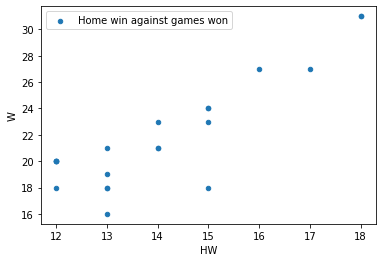

The graph above shows that there is a positive correlation between game won  scored and games won which is : 87.25%


In [63]:
top_20_team_with_most_homeWin_09_10.plot(x="HW",y="W",kind="scatter")
    plt.xlabel("games won on home ground")
    plt.ylabel("team perfomance on games won")
plt.show()
print("The graph above shows that there is a positive correlation between game won  scored and games won which is : {}%".format(round(top_20_team_with_most_homeWin_09_10["HW"].corr(top_20_team_with_most_homeWin_09_10["W"])*100, 2)))

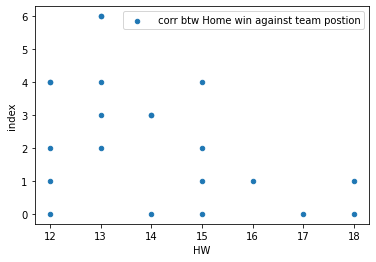

The graph above shows that there is a negative correlation between game won at home and team position at the end of the season which is : -46.71%


In [65]:
top_20_team_with_most_homeWin_09_10.plot(x="HW",y="index",kind="scatter")
plt.legend([" corr btw Home win against team postion"])
plt.show()
print("The graph above shows that there is a negative correlation between game won at home and team position at the end of the season which is : {}%".format(round(top_20_team_with_most_homeWin_09_10["HW"].corr(top_20_team_with_most_homeWin_09_10["index"])*100, 2)))

- the information I can deduce from the here is that a team will be in the top 4 (four) at the end of the season in thier various league if they win 90% of their home games.

<a id='Q5'></a>
## this are the other facts that we can deduce from the dataset.

In [40]:
top_20_team_with_most_awayWin_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74
1,1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67
21,1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58
20,0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71
62,2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31
42,2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13
25,5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13
40,0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33
78,0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41
79,1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27


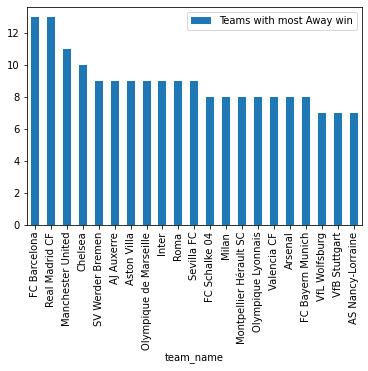

In [41]:
top_20_team_with_most_awayWin_09_10.plot(x="team_name",y="AW",kind="bar")
plt.legend(["Teams with most Away win"])
plt.show()

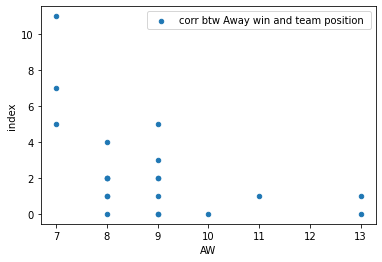

The graph above shows that there is a negative correlation between game won at home and team position at the end of the season which is : -55.68%


In [42]:
top_20_team_with_most_awayWin_09_10.plot(x="AW",y="index",kind="scatter")
plt.legend(["corr btw Away win and team position "])
plt.show()
print("The graph above shows that there is a negative correlation between game won at home and team position at the end of the season which is : {}%".format(round(top_20_team_with_most_awayWin_09_10["F"].corr(top_20_team_with_most_awayWin_09_10["index"])*100, 2)))

In [43]:
top_20_team_with_most_Wins_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
0,0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74
1,1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67
21,1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58
20,0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71
79,1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27
78,0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41
22,2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42
40,0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33
23,3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26
43,3,8639,LOSC Lille,38,14,7,3,4,2,8,21,10,7,70,72,40,32


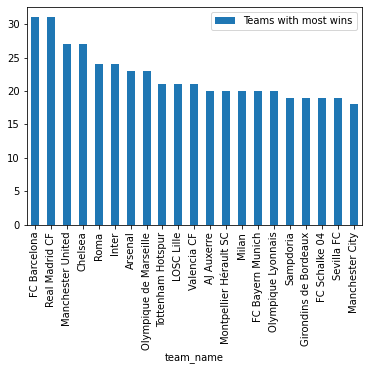

In [44]:
top_20_team_with_most_Wins_09_10.plot(x="team_name",y="W",kind="bar")
plt.legend(["Teams with most wins"])
plt.show()

In [45]:
top_20_team_with_most_homeloss_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
39,19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32
77,17,8177,Hertha BSC Berlin,34,1,4,6,3,10,10,5,20,9,24,34,56,-22
55,15,9874,FC Sochaux-Montbéliard,38,8,3,1,7,10,9,11,19,8,41,28,52,-24
58,18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31
59,19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30
15,15,8696,Racing Santander,38,4,5,5,7,10,7,9,17,12,39,42,59,-17
97,19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34
19,19,9868,Xerez Club Deportivo,38,6,2,4,6,9,11,8,20,10,34,38,66,-28
76,16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31
51,11,8481,AS Nancy-Lorraine,38,6,7,4,5,9,7,13,16,9,48,46,53,-7


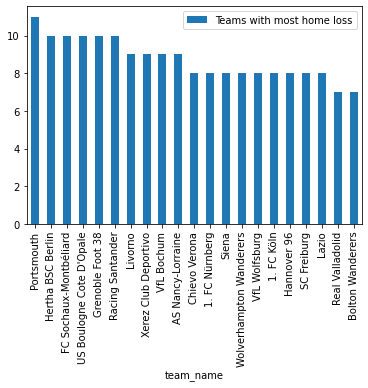

In [46]:
top_20_team_with_most_homeloss_09_10.plot(x="team_name",y="HL",kind="bar")
plt.legend(["Teams with most home loss"])
plt.show()

In [47]:
top_20_team_with_most_awayloss_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
37,17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40
57,17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23
59,19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30
18,18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34
97,19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34
95,17,8524,Atalanta,38,7,2,5,3,7,14,9,21,8,35,37,53,-16
35,15,8528,Wigan Athletic,38,6,3,7,2,6,14,9,20,9,36,37,79,-42
96,18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27
32,12,8472,Sunderland,38,9,2,7,4,3,13,11,16,11,44,48,56,-8
11,11,8371,CA Osasuna,38,7,4,8,2,4,13,11,17,10,43,37,46,-9


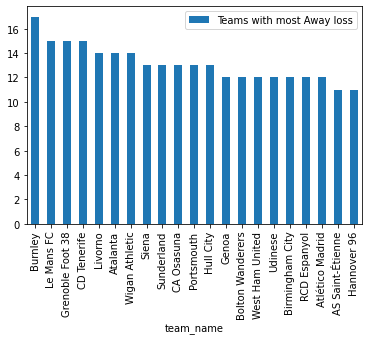

In [48]:
top_20_team_with_most_awayloss_09_10.plot(x="team_name",y="AL",kind="bar")
plt.legend(["Teams with most Away loss"])
plt.show()

In [49]:
top_20_team_with_most_loss_09_10

,index,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-
59,19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30
39,19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32
37,17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40
97,19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34
57,17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23
58,18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31
96,18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27
95,17,8524,Atalanta,38,7,2,5,3,7,14,9,21,8,35,37,53,-16
18,18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34
38,18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41


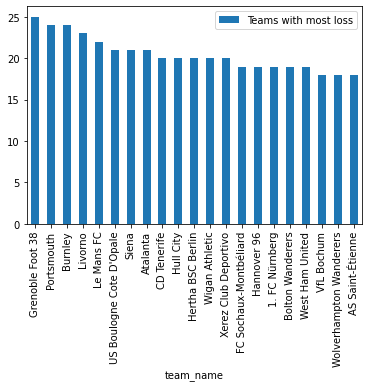

In [50]:
top_20_team_with_most_loss_09_10.plot(x="team_name",y="L",kind="bar")
plt.legend(["Teams with most loss"])
plt.show()

<a id='conclusions'></a>
## Conclusions
> **Tip**: After carrying out the analysis on this dataset I was able to give answers to the questions asked in the Questions section

# After the analysis I carried on this dataset i was able to determine the following

<ol>
<li><a href="#A1">Chelsea scored the most goals in all of europe</a></li>
<li><a href="#A2">Camp nou of FC Barcelona is the most difficult place to get a win in all of europe</a></li>
<li><a href="#A3">If a team scored between 59_100 goals there is possibility of getting into european cup competitions</a></li>
<li><a href="#A4">any team that conceed 59-90 goals will probably be in the lower  end of the table at the end of the season</a></li>
</ol>
the above listed observations are proves that the more a team the chances of winning more matches. we can also deduce that the best form defense any team can have is scoring more goals as we were able to see amongst the top 20 teams with most goals conceeds lesser goals. We are also able to see that teams that conceeded the most goals in their respective leagues get relegated most often times.

### LIMITATIONS:
> **Tip**: Finally, the players dataset need more intensive cleaning because of which I can achive due to the deadline I will have to put hold further analysis at this point so I can avoid being revoked from carrying on with the work i intended doing. But once, I am done submitting i hope can further carry out more analysis and learning from this intresting dataset.



### REFERENCES:
<ol>
<li><a href="https://towardsdatascience.com/hypothesis-testing-european-soccer-data-using-python-af536f94c44a">Connor Anderson, Kevin Velasco, and Alex Shropshire.Hypothesis Testing European Soccer Data; Home Field Advantage, Ideal Formations, and Inter-League Attributes Explored in Python, May 11, 2019</a></li>

<li><a href="#https://www.researchgate.net/publication/343947808_Data_Analyses_of_European_Soccer">Yiou Wang August 2020 Data Analyses of European Soccer </a></li>

<li><a href="https://notebook.community/harishkrao/DSE200x/Week-1-Intro-new/Introduction%20to%20Data%20Science%20in%20Python%20-%20Soccer%20Data%20Analysis">Soccer Data Analysis</a></li>
</ol>
